In [1]:
#importing libraries to retrieve data and read csv and to perform EDa tasks
import pandas as pd
import numpy as np
#importing for visualisation
import seaborn as sns
#sklearn for converting catagorical values to Numeric data

# Real time use case

Customer churn analysis helps businesses understand 
why customers don't return for repeat business. Churn rate tells you
what portion of your customers leave over a period of time

A company's churn rate, or employee churn rate, refers to both the attrition rate and the turnover rate. All of these terms refer to the number of employees who leave the organization during a specified period of time, generally a year. (Note that the term 'churn' used generically can also apply to customers.)

In [2]:


#import dataset
data = pd.read_csv("C://Users//Lenovo//Downloads//Customer_Churn-1.csv")

In [3]:
# After importing : Immediate step is to get the friendship with the data.

#Top 10 recordings
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [4]:
#descriptive stats for numeric columns
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [5]:
#$checking null Values in the data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#changing total charges to numeric as it is continuos variable
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

#errors = 'coerce' : It will ignore all non-numeric values.It will replace all non-numeric values with NaN.

In [8]:
#drop nan values
data = data.dropna(how='any', axis = 0)

# axis=0  will be removing rows from dataset.
# axis=1 will be removing columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
data = data.reset_index()
data

#Pandas reset_index() is a method to reset index of a Data Frame. 
#reset_index() method sets a list of integer ranging from 0 to length of data as index.

index  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0         0  7590-VHVEG  Female              0     Yes         No       1   
1         1  5575-GNVDE    Male              0      No         No      34   
2         2  3668-QPYBK    Male              0      No         No       2   
3         3  7795-CFOCW    Male              0      No         No      45   
4         4  9237-HQITU  Female              0      No         No       2   
...     ...         ...     ...            ...     ...        ...     ...   
7027   7038  6840-RESVB    Male              0     Yes        Yes      24   
7028   7039  2234-XADUH  Female              0     Yes        Yes      72   
7029   7040  4801-JZAZL  Female              0     Yes        Yes      11   
7030   7041  8361-LTMKD    Male              1     Yes         No       4   
7031   7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0              No  No phone service             DSL  ...               No   
1             Yes                No             DSL  ...              Yes   
2             Yes                No             DSL  ...               No   
3              No  No phone service             DSL  ...              Yes   
4             Yes                No     Fiber optic  ...               No   
...           ...               ...             ...  ...              ...   
7027          Yes               Yes             DSL  ...              Yes   
7028          Yes               Yes     Fiber optic  ...              Yes   
7029           No  No phone service             DSL  ...               No   
7030          Yes               Yes     Fiber optic  ...               No   
7031          Yes                No     Fiber optic  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  
0              Electronic check          29.85        29.85     No  
1                  Mailed check          56.95      1889.50     No  
2                  Mailed check          53.85       108.15    Yes  
3     Bank transfer (automatic)          42.30      1840.75     No  
4              Electronic check          70.70       151.65    Yes  
...                         ...            ...          ...    ...  
7027               Mailed check          84.80      1990.50     No  
7028    Credit card (automatic)         103.20      7362.90     No  
7029           Electronic check          29.60       346.45     No  
7030               Mailed check          74.40       306.60    Yes  
7031  Bank transfer (automatic)         105.65      6844.50     No  

[7032 rows x 22 columns]

In [11]:
#extratcing columns names with "object" Datatype
cols = data.select_dtypes(include=['object']).columns
cols
# 17 object data types are present

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
#copying datset
data2 = data.copy()

In [13]:
#import the LabelEncoder class from the sklearn library,
from sklearn.preprocessing import LabelEncoder

#making instance of labelnecoder
le = LabelEncoder()


#Label Encoding is a popular encoding technique for handling categorical variables.
#In this technique, each label is assigned a unique integer based on alphabetical ordering
#It can also be used to transform non-numerical labels to numerical labels.


for i in cols:
    data2[i] = le.fit_transform(data2[i])
    
#fit and transform the object data, and then replace the existing text data with the new encoded data.

# checking the datatypes chnges or not
print (data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   int32  
 2   gender            7032 non-null   int32  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int32  
 5   Dependents        7032 non-null   int32  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int32  
 8   MultipleLines     7032 non-null   int32  
 9   InternetService   7032 non-null   int32  
 10  OnlineSecurity    7032 non-null   int32  
 11  OnlineBackup      7032 non-null   int32  
 12  DeviceProtection  7032 non-null   int32  
 13  TechSupport       7032 non-null   int32  
 14  StreamingTV       7032 non-null   int32  
 15  StreamingMovies   7032 non-null   int32  
 16  Contract          7032 non-null   int32  


In [14]:
data2.head()

index  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0      0        5365       0              0        1           0       1   
1      1        3953       1              0        0           0      34   
2      2        2558       1              0        0           0       2   
3      3        5524       1              0        0           0      45   
4      4        6500       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  ...  DeviceProtection  \
0             0              1                0  ...                 0   
1             1              0                0  ...                 2   
2             1              0                0  ...                 0   
3             0              1                0  ...                 2   
4             1              0                1  ...                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            2            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              2           29.85         29.85      0  
1              3           56.95       1889.50      0  
2              3           53.85        108.15      1  
3              0           42.30       1840.75      0  
4              2           70.70        151.65      1  

[5 rows x 22 columns]

In [15]:
#Pandas profiling is an open source Python module with which we can quickly do an
#exploratory data analysis with just a few lines of code.


import pandas_profiling

# SweetViz
# Pandas-Profiling
# Sweetviz
# Autoviz
# D-Tale

In [16]:
pandas_profiling.ProfileReport(data2)

#The main disadvantage of pandas profiling is its use with large datasets.
#With the increase in the size of the data the time to generate the report also increases a lot.

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
def var_summary(x):
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())
    
    for i in x:
        if i<lc or i>uc:
            count = 1
        else:
            count = 0
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max() , lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX','LC','UC','outlier_flag'])





In [18]:
data2.apply(lambda x: var_summary(x)).T

N  NMISS         SUM         MEAN    MEDIAN  \
df_index          7032.0    0.0  24763625.0  3521.562144  3521.500   
customerID        7032.0    0.0  24720996.0  3515.500000  3515.500   
gender            7032.0    0.0      3549.0     0.504693     1.000   
SeniorCitizen     7032.0    0.0      1142.0     0.162400     0.000   
Partner           7032.0    0.0      3393.0     0.482509     0.000   
Dependents        7032.0    0.0      2099.0     0.298493     0.000   
tenure            7032.0    0.0    227990.0    32.421786    29.000   
PhoneService      7032.0    0.0      6352.0     0.903299     1.000   
MultipleLines     7032.0    0.0      6614.0     0.940557     1.000   
InternetService   7032.0    0.0      6136.0     0.872582     1.000   
OnlineSecurity    7032.0    0.0      5550.0     0.789249     1.000   
OnlineBackup      7032.0    0.0      6370.0     0.905859     1.000   
DeviceProtection  7032.0    0.0      6356.0     0.903868     1.000   
TechSupport       7032.0    0.0      5600.0     0.796359     1.000   
StreamingTV       7032.0    0.0      6926.0     0.984926     1.000   
StreamingMovies   7032.0    0.0      6982.0     0.992890     1.000   
Contract          7032.0    0.0      4842.0     0.688567     0.000   
PaperlessBilling  7032.0    0.0      4168.0     0.592719     1.000   
PaymentMethod     7032.0    0.0     11063.0     1.573237     2.000   
MonthlyCharges    7032.0    0.0    455661.0    64.798208    70.350   
TotalCharges      7032.0    0.0  16056168.7  2283.300441  1397.475   
Churn             7032.0    0.0      1869.0     0.265785     0.000   

                          STD           VAR    MIN     P1       P5  ...  \
df_index          2032.832448  4.132408e+06   0.00  70.31  351.550  ...   
customerID        2030.107879  4.121338e+06   0.00  70.31  351.550  ...   
gender               0.500014  2.500135e-01   0.00   0.00    0.000  ...   
SeniorCitizen        0.368844  1.360459e-01   0.00   0.00    0.000  ...   
Partner              0.499729  2.497296e-01   0.00   0.00    0.000  ...   
Dependents           0.457629  2.094246e-01   0.00   0.00    0.000  ...   
tenure              24.545260  6.024698e+02   1.00   1.00    1.000  ...   
PhoneService         0.295571  8.736218e-02   0.00   0.00    0.000  ...   
MultipleLines        0.948627  8.998938e-01   0.00   0.00    0.000  ...   
InternetService      0.737271  5.435690e-01   0.00   0.00    0.000  ...   
OnlineSecurity       0.859962  7.395345e-01   0.00   0.00    0.000  ...   
OnlineBackup         0.880394  7.750930e-01   0.00   0.00    0.000  ...   
DeviceProtection     0.880178  7.747141e-01   0.00   0.00    0.000  ...   
TechSupport          0.861674  7.424814e-01   0.00   0.00    0.000  ...   
StreamingTV          0.885285  7.837295e-01   0.00   0.00    0.000  ...   
StreamingMovies      0.885385  7.839062e-01   0.00   0.00    0.000  ...   
Contract             0.832934  6.937791e-01   0.00   0.00    0.000  ...   
PaperlessBilling     0.491363  2.414375e-01   0.00   0.00    0.000  ...   
PaymentMethod        1.067504  1.139565e+00   0.00   0.00    0.000  ...   
MonthlyCharges      30.085974  9.051658e+02  18.25  19.20   19.650  ...   
TotalCharges      2266.771362  5.138252e+06  18.80  19.90   49.605  ...   
Churn                0.441782  1.951711e-01   0.00   0.00    0.000  ...   

                        P25       P50        P75       P90        P95  \
df_index          1762.7500  3521.500  5282.2500  6336.900  6689.4500   
customerID        1757.7500  3515.500  5273.2500  6327.900  6679.4500   
gender               0.0000     1.000     1.0000     1.000     1.0000   
SeniorCitizen        0.0000     0.000     0.0000     1.000     1.0000   
Partner              0.0000     0.000     1.0000     1.000     1.0000   
Dependents           0.0000     0.000     1.0000     1.000     1.0000   
tenure               9.0000    29.000    55.0000    69.000    72.0000   
PhoneService         1.0000     1.000     1.0000     1.000     1.0000   
MultipleLines        0.0000  

# Linear Regression


> Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression <br>
> A simple linear regression model is given by Y=mX+b <br>
> where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable. <br>
> Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points.
Linear Regression has dependent variables that have continuous values

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

In [19]:
X_1 = data2.drop('TotalCharges', axis = 1)

In [20]:
y_1 = data2['TotalCharges']

In [21]:
data2.corr()

df_index  customerID    gender  SeniorCitizen   Partner  \
df_index          1.000000   -0.006309 -0.008463       0.008057  0.000162   
customerID       -0.006309    1.000000  0.006235      -0.002368 -0.026509   
gender           -0.008463    0.006235  1.000000      -0.001819 -0.001379   
SeniorCitizen     0.008057   -0.002368 -0.001819       1.000000  0.016957   
Partner           0.000162   -0.026509 -0.001379       0.016957  1.000000   
Dependents       -0.004762   -0.011871  0.010349      -0.210550  0.452269   
tenure            0.006801    0.007209  0.005285       0.015683  0.381912   
PhoneService     -0.028257   -0.006987 -0.007515       0.008392  0.018397   
MultipleLines    -0.006518    0.004497 -0.006908       0.146287  0.142717   
InternetService  -0.007689   -0.012335 -0.002236      -0.032160  0.000513   
OnlineSecurity   -0.001053    0.013740 -0.014899      -0.127937  0.150610   
OnlineBackup      0.004099   -0.002960 -0.011920      -0.013355  0.153045   
DeviceProtection -0.006353   -0.006726  0.001348      -0.021124  0.165614   
TechSupport       0.008621    0.001763 -0.006695      -0.151007  0.126488   
StreamingTV      -0.000675   -0.007650 -0.005624       0.031019  0.136679   
StreamingMovies  -0.017201   -0.017207 -0.008920       0.047088  0.129907   
Contract          0.003949    0.015949  0.000095      -0.141820  0.294094   
PaperlessBilling  0.002143   -0.002225 -0.011902       0.156258 -0.013957   
PaymentMethod     0.021046    0.011754  0.016942      -0.038158 -0.156232   
MonthlyCharges   -0.012938   -0.004445 -0.013779       0.219874  0.097825   
TotalCharges      0.001820   -0.000263  0.000048       0.102411  0.319072   
Churn             0.010133   -0.017858 -0.008545       0.150541 -0.149982   

                  Dependents    tenure  PhoneService  MultipleLines  \
df_index           -0.004762  0.006801     -0.028257      -0.006518   
customerID         -0.011871  0.007209     -0.006987       0.004497   
gender              0.010349  0.005285     -0.007515      -0.006908   
SeniorCitizen      -0.210550  0.015683      0.008392       0.146287   
Partner             0.452269  0.381912      0.018397       0.142717   
Dependents          1.000000  0.163386     -0.001078      -0.024975   
tenure              0.163386  1.000000      0.007877       0.343673   
PhoneService       -0.001078  0.007877      1.000000      -0.020504   
MultipleLines      -0.024975  0.343673     -0.020504       1.000000   
InternetService     0.044030 -0.029835      0.387266      -0.108849   
OnlineSecurity      0.151198  0.327283     -0.014163       0.007306   
OnlineBackup        0.090231  0.372434      0.024040       0.117276   
DeviceProtection    0.079723  0.372669      0.004718       0.122614   
TechSupport         0.132530  0.324729     -0.018136       0.010941   
StreamingTV         0.046214  0.290572      0.056393       0.175403   
StreamingMovies     0.022088  0.296785      0.043025       0.181705   
Contract            0.240556  0.676734      0.003019       0.111029   
PaperlessBilling   -0.110131  0.004823      0.016696       0.165306   
PaymentMethod      -0.041989 -0.370087     -0.005499      -0.176598   
MonthlyCharges     -0.112343  0.246862      0.248033       0.433905   
TotalCharges        0.064653  0.825880      0.113008       0.453202   
Churn              -0.163128 -0.354049      0.011691       0.038043   

                  InternetService  ...  DeviceProtection  TechSupport  \
df_index                -0.007689  ...         -0.006353     0.008621   
customerID              -0.012335  ...         -0.006726     0.001763   
gender                  -0.002236  ...          0.001348    -0.006695   
SeniorCitizen           -0.032160  ...         -0.021124    -0.151007   
Partner                  0.000513  ...          0.165614     0.126488   
Dependents               0.044030  ...          0.079723     0.132530   
tenure                  -0.029835  ...          0.372669     0.324729   
PhoneService             0.3

In [22]:
# improting library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25, random_state = 1111)

In [23]:
#checking the shape of training and testing data
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(5274, 21)
(1758, 21)
(5274,)
(1758,)


In [24]:
# * Feature Scaling | Scaling the variables | standardizign the variable | Z - score | Mean = 0 and STD = 1
# To get all the variables on same scale [towards ZERO]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



#The fit method is calculating the mean and variance of each of the features present in our train data.
#The transform method is transforming all the features using the respective mean and variance. 

X_train_1 = sc.fit_transform(X_train_1)# you are finding the MEan and STD{with the fit()
#                                    }on training data and aslo transforming that

X_test_1= sc.transform(X_test_1)  # Only tranforming now


#transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  
lm.fit(X_train_1, y_train_1)

LinearRegression()

In [26]:
print(lm.intercept_)

2277.7827645051198


In [27]:
# The coefficients
print('Coefficients', lm.coef_)

Coefficients [ 1.67435056e+00 -1.21592576e+00  9.36384978e+00  7.47791487e-01
  8.75532709e+00 -1.64395198e+01  1.49795207e+03 -1.32435809e+01
  3.52073262e+01 -1.32013722e+01  9.14191335e+01  1.14980710e+02
  8.41858741e+01  8.09522416e+01  4.15371148e+01  4.78567718e+01
 -8.67741524e+01 -8.33581430e+00  5.43558008e+01  1.04663509e+03
 -8.03192908e+01]


In [28]:
#Testing
y_pred = lm.predict(X_test_1)

In [29]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [30]:
y_pred

Predicted
0     3305.856021
1    -1200.141076
2     2628.853682
3     3062.706854
4     2994.841653
...           ...
1753  2052.786703
1754  5089.259245
1755  1658.150121
1756  3140.118481
1757  3199.745140

[1758 rows x 1 columns]

In [31]:
y_test_1

3906    1874.30
5978      20.35
5738    2333.05
5743    1796.55
5271    2531.40
         ...   
1826    1381.80
2785    5551.15
1766    1201.15
5872    2727.30
1382    1643.25
Name: TotalCharges, Length: 1758, dtype: float64

### Calculating mean square error ... RMSE
> RMSE calculate the difference between the actual value and predicted value of the response(dependant) variable <br>
> The square root of the mean/average of the square of all of the error. <br> 
> Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
> The lesser the RMSE value, the better is the model.

In [32]:
from sklearn import metrics 
import numpy as np

#Absolute Error is the amount of error in your measurements.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, y_pred)))

Mean Absolute Error: 555.1405460192393
Mean Squared Error: 478817.97456224787
Root Mean Squared Error: 691.9667438267882


### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> R-squared = Explained variation / Total variation <br>
> Total variation is variation of response variable around it's mean. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

In [33]:
#finding R-squared value
from sklearn.metrics import r2_score


In [34]:
print(r2_score(y_test_1, y_pred))

0.9067679081449613


# Logistic Regression


Logistic Regression is used when the dependent variable(target) is categorical. logistic regression is a predictive analysis.
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

In [35]:
#dividing independent and dependent variables
X = data2.iloc[:,:21]
y = data2.iloc[:,21:]

In [36]:
X.head()

df_index  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         0        5365       0              0        1           0       1   
1         1        3953       1              0        0           0      34   
2         2        2558       1              0        0           0       2   
3         3        5524       1              0        0           0      45   
4         4        6500       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  ...  OnlineBackup  \
0             0              1                0  ...             2   
1             1              0                0  ...             0   
2             1              0                0  ...             2   
3             0              1                0  ...             0   
4             1              0                1  ...             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15  
3                 0              0           42.30       1840.75  
4                 1              2           70.70        151.65  

[5 rows x 21 columns]

In [37]:
y.head()

Churn
0      0
1      0
2      1
3      0
4      1

In [38]:
# improting library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [39]:
#importing lib for data to be align in standard scaling manner
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression 

In [41]:
#Creating intsnce of logistic regression and then fitting the data
logistic_reg= LogisticRegression()
logistic_reg.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [42]:
#predicting the test data.....
y_pred=logistic_reg.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
#predcition on train data
y_pred_train = logistic_reg.predict(X_train)

# Confusion matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

Sklearn has two great functions: confusion_matrix() and classification_report().

Sklearn confusion_matrix() returns the values of the Confusion matrix.
The output is, however, slightly different from what we have studied so far.
It takes the rows as Actual values and the columns as Predicted values. 
The rest of the concept remains the same.
Sklearn classification_report() outputs precision, recall and f1-score for each target class. 
In addition to this, it also has some extra values: micro avg, macro avg, and weighted avg

In [45]:
#importing library for confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1165,  138],
       [ 206,  249]], dtype=int64)

In [46]:
#finding accuracy of model
log_acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',log_acc)

Accuracy:  0.8043230944254836


<AxesSubplot:>

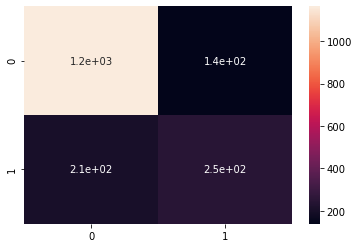

In [47]:
sns.heatmap(cnf_matrix, annot=True)

In [48]:
#importing library for classification_report and finding report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1303
           1       0.64      0.55      0.59       455

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



# Desicion Tree

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

**Advantages of decision trees:**

- Can be used for regression or classification
- Can be displayed graphically
- Highly interpretable
- Can be specified as a series of rules, and more closely approximate human decision-making than other models
- Prediction is fast
- Features don't need scaling
- Automatically learns feature interactions
- Tends to ignore irrelevant features
- Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)
- Robust to the outliers
- Impact of Missing values is Minimal

In [49]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
# Spliting the overall data into X and Y [this is what required in ML]

X = data2.iloc[:, :21]

y = data2.iloc[:, 21:]

In [51]:
X

df_index  customerID  gender  SeniorCitizen  Partner  Dependents  \
0            0        5365       0              0        1           0   
1            1        3953       1              0        0           0   
2            2        2558       1              0        0           0   
3            3        5524       1              0        0           0   
4            4        6500       0              0        0           0   
...        ...         ...     ...            ...      ...         ...   
7027      7038        4843       1              0        1           1   
7028      7039        1524       0              0        1           1   
7029      7040        3358       0              0        1           1   
7030      7041        5923       1              1        1           0   
7031      7042        2221       1              0        0           0   

      tenure  PhoneService  MultipleLines  InternetService  ...  OnlineBackup  \
0          1             0              1                0  ...             2   
1         34             1              0                0  ...             0   
2          2             1              0                0  ...             2   
3         45             0              1                0  ...             0   
4          2             1              0                1  ...             0   
...      ...           ...            ...              ...  ...           ...   
7027      24             1              2                0  ...             0   
7028      72             1              2                1  ...             2   
7029      11             0              1                0  ...             0   
7030       4             1              2                1  ...             0   
7031      66             1              0                1  ...             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7027                 2            2            2                2         1   
7028                 2            0            2                2         1   
7029                 0            0            0                0         0   
7030                 0            0            0                0         0   
7031                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7027                 1              3           84.80       1990.50  
7028                 1              1          103.20       7362.90  
7029                 1              2           29.60        346.45  
7030                 1              3           74.40        306.60  
7031                 1              0          105.65       6844.50  

[7032 rows x 21 columns]

In [52]:
y

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7027      0
7028      0
7029      0
7030      1
7031      0

[7032 rows x 1 columns]

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)


In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
#importing library for Descision Tree and we have two criterion for DT 'gini' and 'Entropy'
# you can use gini when there is binary classification otherwise use entropy

from sklearn.tree import DecisionTreeClassifier

#max_depth -  the maximum height upto which the trees inside the forest can grow(to avoid overfitting)
#min_samples_split- minimum amount of samples an internal node must hold in order to split into further nodes(default value -2.)
#min_samples_leaf -  minimum amount of samples that a node must hold after getting split(default value -1.)

#making instance of DT
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,
                                    max_depth = 2, min_samples_leaf = 10, min_samples_split = 20
                                   )
#fitting the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [56]:
#prediction using 'testing' data
y_pred = classifier.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
#checking score via importing library
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_pred,y_test)
DT_acc

0.7468714448236633

In [59]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[985, 318],
       [127, 328]], dtype=int64)

In [60]:
#checking Auc_Roc_Score via importing library
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(y_test,y_pred)

0.7384134668094761

# Hypertuning
    


it is used to increases the performance of a model via providing best parameters

In [62]:
#importing library for hypertuning
from sklearn.model_selection import GridSearchCV

In [63]:
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 10),  # 5
        'min_samples_split': range(20, 81, 20)}   # 4
#intance of GScv
gscv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [64]:
#fitiing the data
gscv.fit(X,y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 51, 10),
                         'min_samples_split': range(20, 81, 20)},
             scoring='recall', verbose=True)

In [65]:
#finding best params for model
gscv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}

**Disadvantages of decision trees:**
    
- Performance is (generally) not competitive with the best supervised learning methods
    - Use Ensembles 
- Can easily overfit the training data (tuning is required / PRUNING standard concept )

- Small variations in the data can result in a completely different tree (high variance)
    - Use Ensembles to reduce the variance
    
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Doesn't tend to work well if the classes are highly unbalanced
- Doesn't tend to work well with very small datasets

# RANDOM FOREST

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees. 

In [66]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(X_train, y_train)

<ipython-input-66-f87858d2a048>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2.fit(X_train, y_train)


RandomForestClassifier(n_estimators=70, random_state=0)

In [67]:
y_pred = classifier2.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,y_pred)
RF_acc

0.8037542662116041

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7052693277558972

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1185,  118],
       [ 227,  228]], dtype=int64)

In [71]:
#n_estimators :- int, default=100
#The number of trees in the forest- the n_estimator parameter controls the number of trees inside the classifier.
#max_features helps to find the number of features to take into account in order to make the best split


pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120],
                  'max_features': [5,10,15,20,25]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_rf.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.79209177 0.79337159 0.79237576 0.7928022  0.78995826 0.79066919
 0.78313331 0.78711502 0.78967457 0.78981591 0.7807154  0.78099858
 0.78555    0.78554929 0.78839465 0.78199432 0.78270576 0.78412904
 0.78597694 0.7825627         nan        nan        nan        nan
        nan]
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 15, 20, 25],
                         'n_estimators': [70, 80, 90, 100, 120]},
             verbose=True)

In [72]:
gscv_rf.best_params_

{'max_features': 5, 'n_estimators': 80}

Importing libraries to draw tree structre

In [73]:
from matplotlib import pyplot as plt
from sklearn import tree

[Text(418.5, 453.0, 'X[16] <= 0.5\ngini = 0.392\nsamples = 5274\nvalue = [3860, 1414]'),
 Text(209.25, 271.8, 'X[10] <= 0.5\ngini = 0.49\nsamples = 2931\nvalue = [1669, 1262]'),
 Text(104.625, 90.59999999999997, 'gini = 0.5\nsamples = 1985\nvalue = [970, 1015]'),
 Text(313.875, 90.59999999999997, 'gini = 0.386\nsamples = 946\nvalue = [699, 247]'),
 Text(627.75, 271.8, 'X[19] <= 99.85\ngini = 0.121\nsamples = 2343\nvalue = [2191, 152]'),
 Text(523.125, 90.59999999999997, 'gini = 0.077\nsamples = 1912\nvalue = [1835, 77]'),
 Text(732.375, 90.59999999999997, 'gini = 0.287\nsamples = 431\nvalue = [356, 75]')]

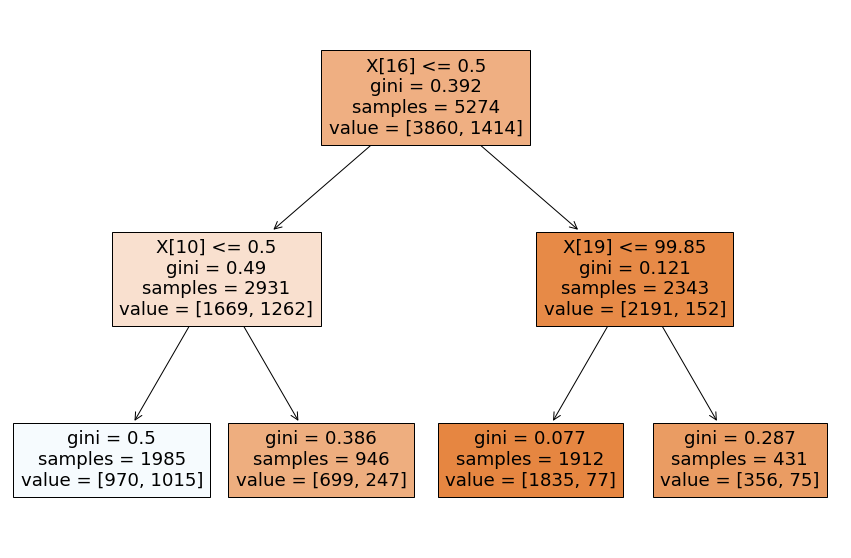

In [74]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)

# KNN

1.Supervised Learning technique.
2.K-NN algorithm can be used for Regression & Classification -  mostly Classification problems.
3.K-NN is a non-parametric algoritham- which means it does not make any assumption on underlying data.
4.It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset.
5.At the time of classification, it performs an action on the dataset.
6.Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm,

Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.

In [75]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)




#p : integer, optional (default = 2)
#Power parameter for the Minkowski metric. 
#When p = 1, this is equivalent to using manhattan_distance (l1), 
# and euclidean_distance (l2) for p = 2.

#metric : string or callable, default ‘minkowski’

#The Minkowski distance is a metric in a normed vector space which can be considered as a 
# generalization of both the Euclidean distance and the Manhattan distance.

#the distance metric to use for the tree. The default metric is minkowski, 
#and with p=2 is equivalent to the standard Euclidean metric.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [76]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [77]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1215,   88],
       [ 392,   63]], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_pred,y_test)
KNN_acc

0.726962457337884

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.5866428745101111

<AxesSubplot:>

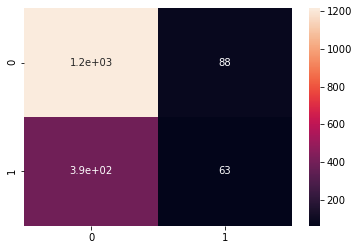

In [80]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
pGrid = {'n_neighbors': range(10,200),
        'leaf_size': range(10, 51, 10), }


gscv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [83]:
gscv.fit(X,y)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 51, 10),
                         'n_neighbors': range(10, 200)},
             scoring='recall', verbose=True)

In [84]:
gscv.best_params_

{'leaf_size': 10, 'n_neighbors': 11}